In [0]:
import numpy as np
import pandas as pd
import itertools as it
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

### General

In [0]:
#Importamos métricas de evaluación extrínsica que se usarán para la evalución de los distintos algoritmos
from sklearn.metrics import calinski_harabasz_score, silhouette_score

#Creamos una tabla para comparar los datos
column_names = ["calinski_harabasz", "silhouette_score"]
df = pd.DataFrame(columns = column_names)

In [0]:
# Obtenemos el data set
data = pd.read_csv("https://raw.githubusercontent.com/jignacioh/ActividadAprendizaNoSupervisado/master/Mall_Customers.csv") 

In [0]:
# Vamos a analizar en base a dos variables:  Ingresos y Puntaje de gastos asociados a un consumidor
Dx = data.iloc[:, [3, 4]].values

### K means


Centros encontrados...
[[25.72727273 79.36363636]
 [88.2        17.11428571]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [55.2962963  49.51851852]]


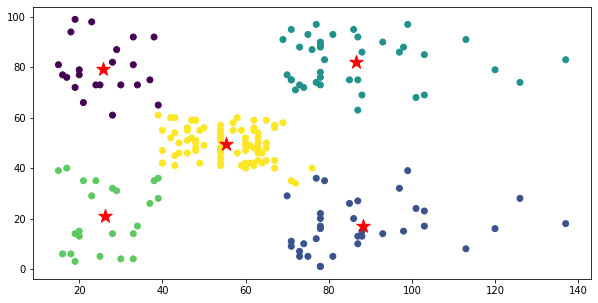

In [20]:
from sklearn.cluster import KMeans

# Se inicializa KMeans con el número de clústeres a buscar
k_means = KMeans(n_clusters=5)

# Se aprende el modelo
k_means = k_means.fit(Dx)

# Predicción de clusters
Dy_kmeans= k_means.predict(Dx)

# Obtenemos los centros de los clústeres
cDx_kmeans = k_means.cluster_centers_

print("Centros encontrados...")
print(cDx_kmeans)

# Ver asignaciones finales
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(Dx[:,0],Dx[:,1], c=Dy_kmeans)
ax.scatter(cDx_kmeans[:,0],cDx_kmeans[:,1], marker='*', s=200, c='r')

In [21]:
df.loc['kmeans'] = [calinski_harabasz_score(Dx, Dy_kmeans),silhouette_score(Dx,Dy_kmeans) ]
df

,calinski_harabasz,silhouette_score
kmeans,247.358993,0.553932


### Agrupamiento aglomerativo

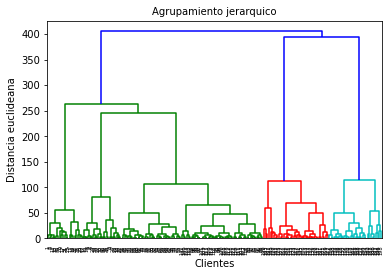

In [22]:
import scipy.cluster.hierarchy as sch
#Realizamos la gráfica a través del método de scipy llamado dendrograme. Como parametros le pasamos 
dendrogram = sch.dendrogram(sch.linkage(Dx, method = 'ward'))
plt.title('Agrupamiento jerarquico', fontsize = 10)
plt.xlabel('Clientes')
plt.ylabel('Distancia euclideana')
plt.show()

Implementamos el algoritmo a través de la librería de sklearn. Como parámetros le pasamos el número de clusters, la forma en que vamos a medir la distancia (euclideana). El parámetro de linkage nos da la opción de elegir el método que utilizaremos para fusionar los pares de clusters. Las alternativas existentes son:   
- Ward: minimiza la varianza de los grupos que se fusionan.  
- Avarage: usa el promedio de las distancias de cada observación de los dos conjuntos.    
- Complete: utiliza las distancias máximas entre todas las observaciones de los dos conjuntos.  
- Single: usa el mínimo de las distancias entre todas las observaciones de los dos conjuntos.  

Implementamos el método para agrupamiento jerarquico disponible en sklearn en donde establecemos 3 parámetros:  

- N° de clusters  
- Affinity: se establece la forma en que se calculará la distancia
- Linkage: Se establece cual es el criterio de vinculación entre los pares de cluster. El algoritmo fusionará los pares de clúster que minimizan este criterio
     Dentro de los criterios se encuentran:  
     - average: usa el promedio de las distancias de cada observación de los dos conjuntos.  
     - complete: utiliza las distancias máximas entre todas las observaciones de los dos conjuntos.  
     - single: usa el mínimo de las distancias entre todas las observaciones de los dos conjuntos.  

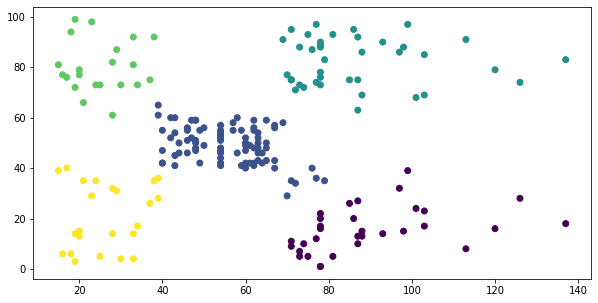

In [23]:
from sklearn.cluster import AgglomerativeClustering
aglomerativo= AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')

#Se aprende el modelo
aglomerativo=aglomerativo.fit(Dx)

#Prediccion de clusters
Dy_aglomerativo=aglomerativo.fit_predict(Dx)

# Ver asignaciones finales
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(Dx[:,0],Dx[:,1], c=Dy_aglomerativo)
#ax.scatter(cDx_kmeans[:,0],cDx_kmeans[:,1], marker='*', s=200, c='r')

In [24]:
df.loc['algomerativo'] = [calinski_harabasz_score(Dx, Dy_aglomerativo),silhouette_score(Dx,Dy_aglomerativo) ]
df

,calinski_harabasz,silhouette_score
kmeans,247.358993,0.553932
algomerativo,243.071429,0.552995


### Espectral

In [25]:
from sklearn.cluster import SpectralClustering
K = 5
knn = 5
# Inicializacion del modelo  SpectralClustering y entrenamiento usando matriz laplaciana normalizada y matriz de afinidad completa
clustering = SpectralClustering(n_clusters = K, 
                                affinity = 'nearest_neighbors', n_neighbors = knn,
                                random_state = 0).fit(Dx)

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [0]:
# Obtencion de valores predichos
Dyp_espectral = clustering.labels_

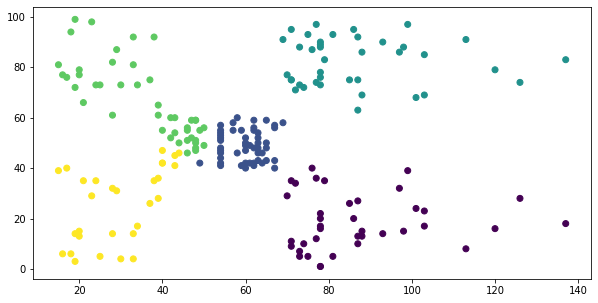

In [28]:
# Ploteo del resultado
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(Dx[:,0], Dx[:,1], c=Dyp_espectral)


In [29]:
df.loc['espectral'] = [calinski_harabasz_score(Dx, Dyp_espectral),silhouette_score(Dx,Dyp_espectral) ]
df

,calinski_harabasz,silhouette_score
kmeans,247.358993,0.553932
algomerativo,243.071429,0.552995
espectral,190.436581,0.420832


### DBSCAN

In [30]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


Mediante NearestNeighbors podemos hallar la distancia de cada punto a su vecino mas cercano especificando un parametro n_neighbors, kneighbors es el metodo que retorna un array primero con las distancia de los n_neighbors mas cercanos y otro array con los indices

In [0]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(Dx)
distances, indices = nbrs.kneighbors(Dx)

La implementacion realizada aqui abajo nos permite hallar el valor optimo de epsilon es la curvatura maxima en la grafica superior(=7)

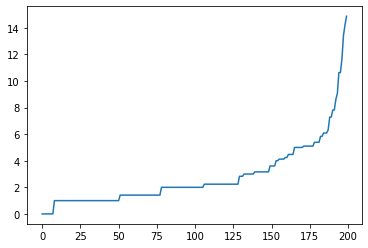

In [32]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

Implementacion de libreria de DBSCAN, podemos jugar con el valor de M

In [33]:
m = DBSCAN(eps=7, min_samples=5)
m.fit(Dx)

DBSCAN(algorithm='auto', eps=7, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

Obtenemos el numero de clusters del modelo

In [0]:
clusters = m.labels_

In [0]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'yellow', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

Ploteamos el resultado, DBSCAN intentara clasificar las puntos con areas con mayor densidad como clusters y los puntos azules oscuros como puntos ruido

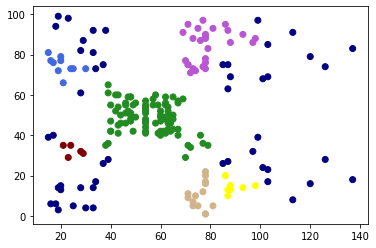

In [36]:
plt.scatter(Dx[:,0], Dx[:,1], c=vectorizer(clusters))

In [37]:
df.loc['DBSCAN'] = [calinski_harabasz_score(Dx, clusters),silhouette_score(Dx,clusters) ]
df

,calinski_harabasz,silhouette_score
kmeans,247.358993,0.553932
algomerativo,243.071429,0.552995
espectral,190.436581,0.420832
DBSCAN,23.492392,0.234123


### Probabilístico

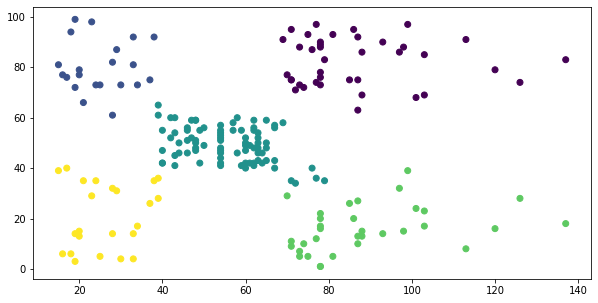

In [38]:
from sklearn.mixture import GaussianMixture

# Se inicializa el método con 5 clusters a buscar
probabilistico= GaussianMixture(n_components = 5, max_iter = 200)

# Se aprende el modelo
probabilistico = probabilistico.fit(Dx)

# Se predicen las asignaciones a clústeres
Dy_probabilistico = probabilistico.predict(Dx)

# Ver asignaciones finales
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(Dx[:,0],Dx[:,1], c=Dy_probabilistico)

In [39]:
df.loc['probabilístico'] = [calinski_harabasz_score(Dx, Dy_probabilistico),silhouette_score(Dx,Dy_probabilistico) ]
df

,calinski_harabasz,silhouette_score
kmeans,247.358993,0.553932
algomerativo,243.071429,0.552995
espectral,190.436581,0.420832
DBSCAN,23.492392,0.234123
probabilístico,243.552629,0.552824
